### Requirements and Dataset

#### importing libs and dataset

In [2]:
# importing libs and dataset
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

df_original = pd.read_csv('dataset/online_shoppers_intention.csv')
df_original.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


### Exploratory data analysis

#### basic info

In [2]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
# shape, null values and shape

shape = df_original.shape
nulls = df_original.isna().sum()
nuniq = df_original.nunique()


print(f'NULLS SUM : \n {nulls}')
print(f'NUNIQUE SUM : \n {nuniq}')
print(f'SHAPE : \n {shape}')

NULLS SUM : 
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
NUNIQUE SUM : 
 Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region             

#### Plots

In [41]:
# continuous and categorical
df = df_original.copy()

continuous = []
categorical = []

for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)


In [114]:
# Plot settings
plot_settings = {
    'style': 'ggplot',  # Use 'ggplot' or another available style
    'palette': 'pastel',
    'title_fontsize': 16,
    'axis_fontsize': 12,
    'legend_title_fontsize': 14,
    'legend_fontsize': 12,
    'wedge_edgecolor': 'black',
    'autotext_fontsize': 12,
    'autotext_color': 'black',
    'autotext_weight': 'bold',
    'bar_colors': ['#FF9999', '#66B2FF'],
    'crosstab_colors': ['#FF9999', '#66B2FF']
}

# Set plot style
plt.style.use(plot_settings['style'])

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


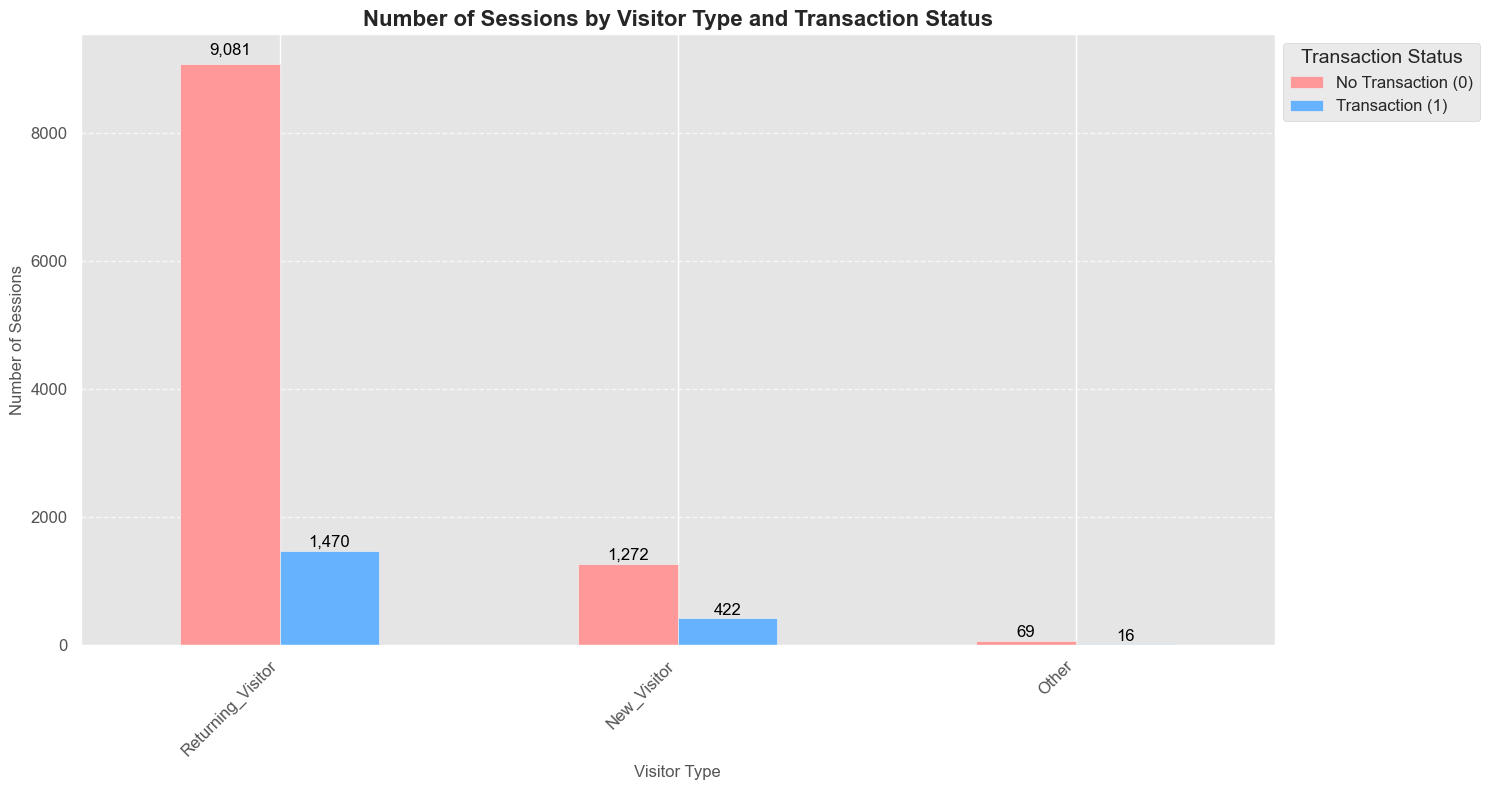

In [97]:
# Visitor Type and Total Transactions

# Print value counts
print(df['VisitorType'].value_counts())

# Filter DataFrame
new_df = df[df['VisitorType'] != 'Other'][['VisitorType', 'Revenue']]

# Group by VisitorType and Revenue
revenue_visitor_df = df.groupby(['VisitorType', 'Revenue']).size().unstack(fill_value=0).reset_index()
revenue_visitor_df.columns = ['VisitorType', 'No Transaction (0)', 'Transaction (1)']

# Total Sessions
revenue_visitor_df['Total Sessions'] = revenue_visitor_df['No Transaction (0)'] + revenue_visitor_df['Transaction (1)']
revenue_visitor_df = revenue_visitor_df.sort_values(by='Total Sessions', ascending=False).drop(columns='Total Sessions')

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
revenue_visitor_df.plot(kind='bar', x='VisitorType', stacked=False, color=plot_settings['bar_colors'], ax=ax)
plt.title('Number of Sessions by Visitor Type and Transaction Status', fontsize=plot_settings['title_fontsize'], fontweight='bold')
plt.xlabel('Visitor Type', fontsize=plot_settings['axis_fontsize'])
plt.ylabel('Number of Sessions', fontsize=plot_settings['axis_fontsize'])

# Add value labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01 * height, f'{height:,}', 
                ha='center', va='bottom', fontsize=plot_settings['axis_fontsize'], color='black')

plt.xticks(rotation=45, ha='right', fontsize=plot_settings['axis_fontsize'])
plt.yticks(fontsize=plot_settings['axis_fontsize'])
plt.legend(title='Transaction Status', title_fontsize=plot_settings['legend_title_fontsize'], fontsize=plot_settings['legend_fontsize'], loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('n_by_visitor_type.png')
plt.show()

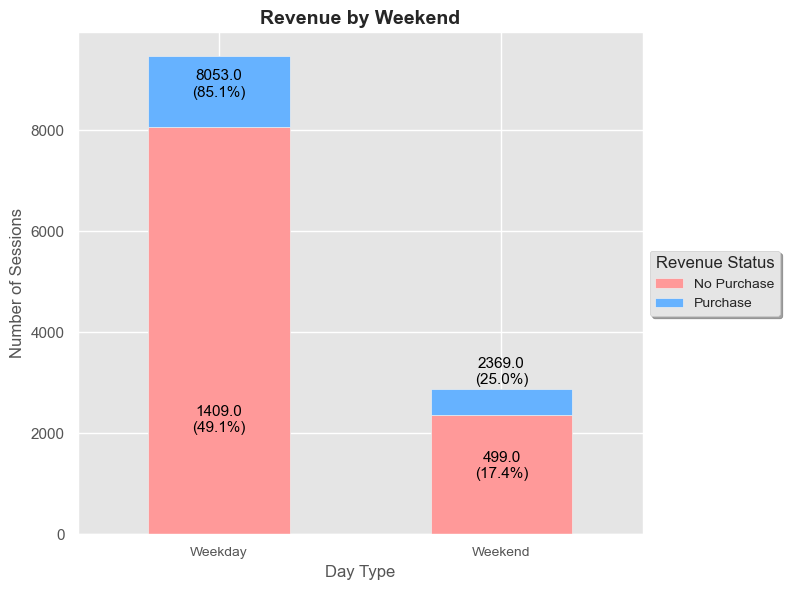

In [205]:
# Create crosstab day type x revenue 
crosstab = pd.crosstab(df['Weekend'], df['Revenue'])
crosstab.columns = ['No Purchase', 'Purchase']

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
crosstab.plot(kind='bar', stacked=True, ax=ax, color=plot_settings['crosstab_colors'])
plt.ylabel('Number of Sessions', fontsize=12)
plt.xlabel('Day Type', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], fontsize=10, rotation=0)
plt.title('Revenue by Weekend', fontsize=14, fontweight='bold')

# Rename legend categories
plt.legend(title='Revenue Status', labels=['No Purchase', 'Purchase'], fontsize=10, title_fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), shadow=True)

# Add data labels
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    if height > 0:
        total_sessions = crosstab.iloc[i // 2].sum()
        percentage = height / total_sessions * 100
        ax.annotate(f'{height}\n({percentage:.1f}%)', 
                    xy=(patch.get_x() + patch.get_width() / 2, height), 
                    xytext=(0, 20), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom', 
                    fontsize=11, 
                    color='black')

plt.tight_layout()
# plt.savefig('revenue_by_weekend.png', dpi=300)
plt.show()


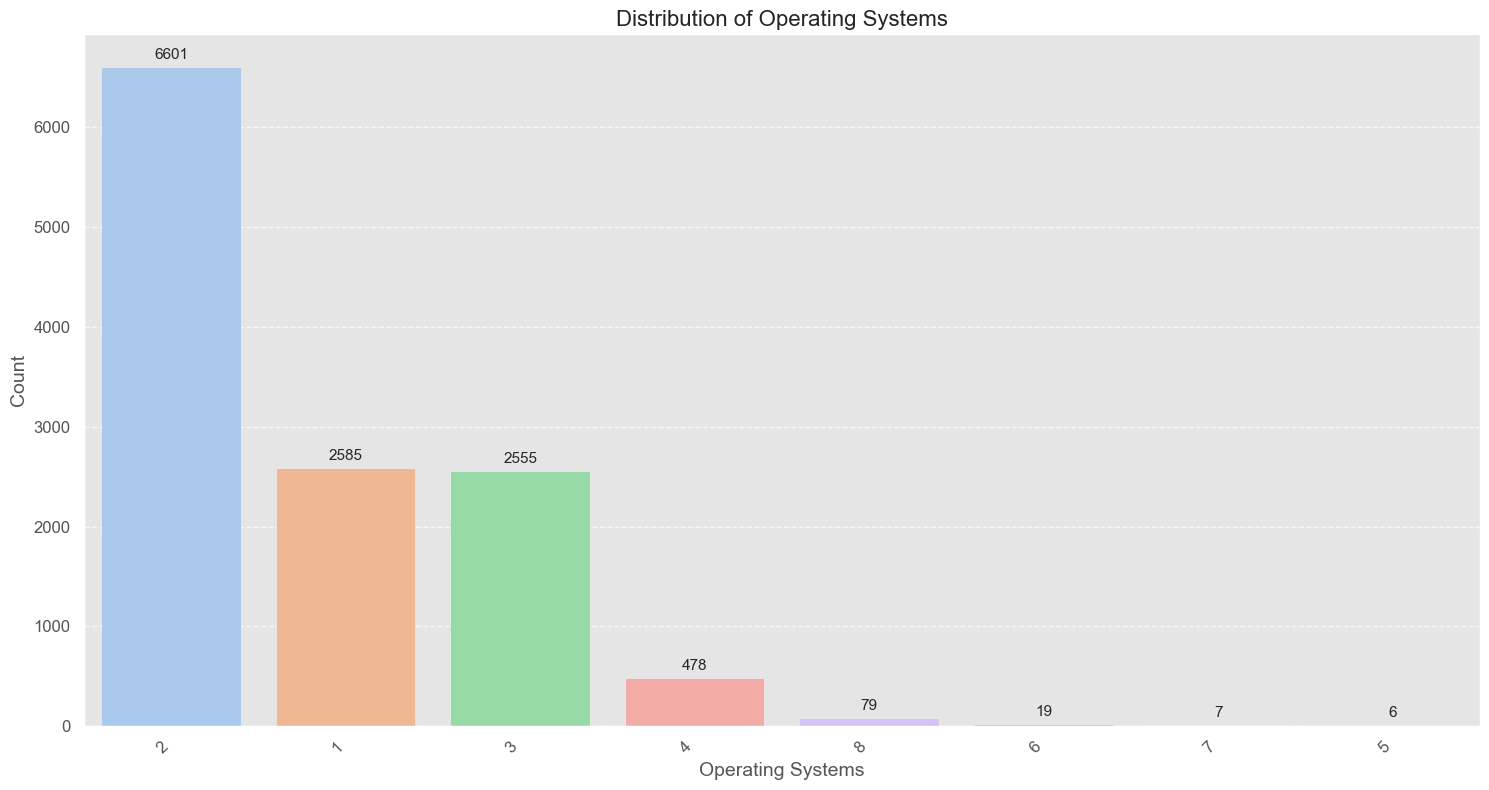

In [207]:
# OperatingSystems distribution
os_df = df['OperatingSystems'].value_counts().reset_index()
os_df.columns = ['OperatingSystems', 'count']
os_df_sorted = os_df.sort_values(by='count', ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x='OperatingSystems', y='count', data=os_df_sorted, palette='pastel', order=os_df_sorted['OperatingSystems'])

# Improve aesthetics
plt.xlabel('Operating Systems', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Operating Systems', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Add value labels on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     fontsize=11)

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything neatly
# plt.savefig('o_s_dist.png', dpi=300)
plt.show()

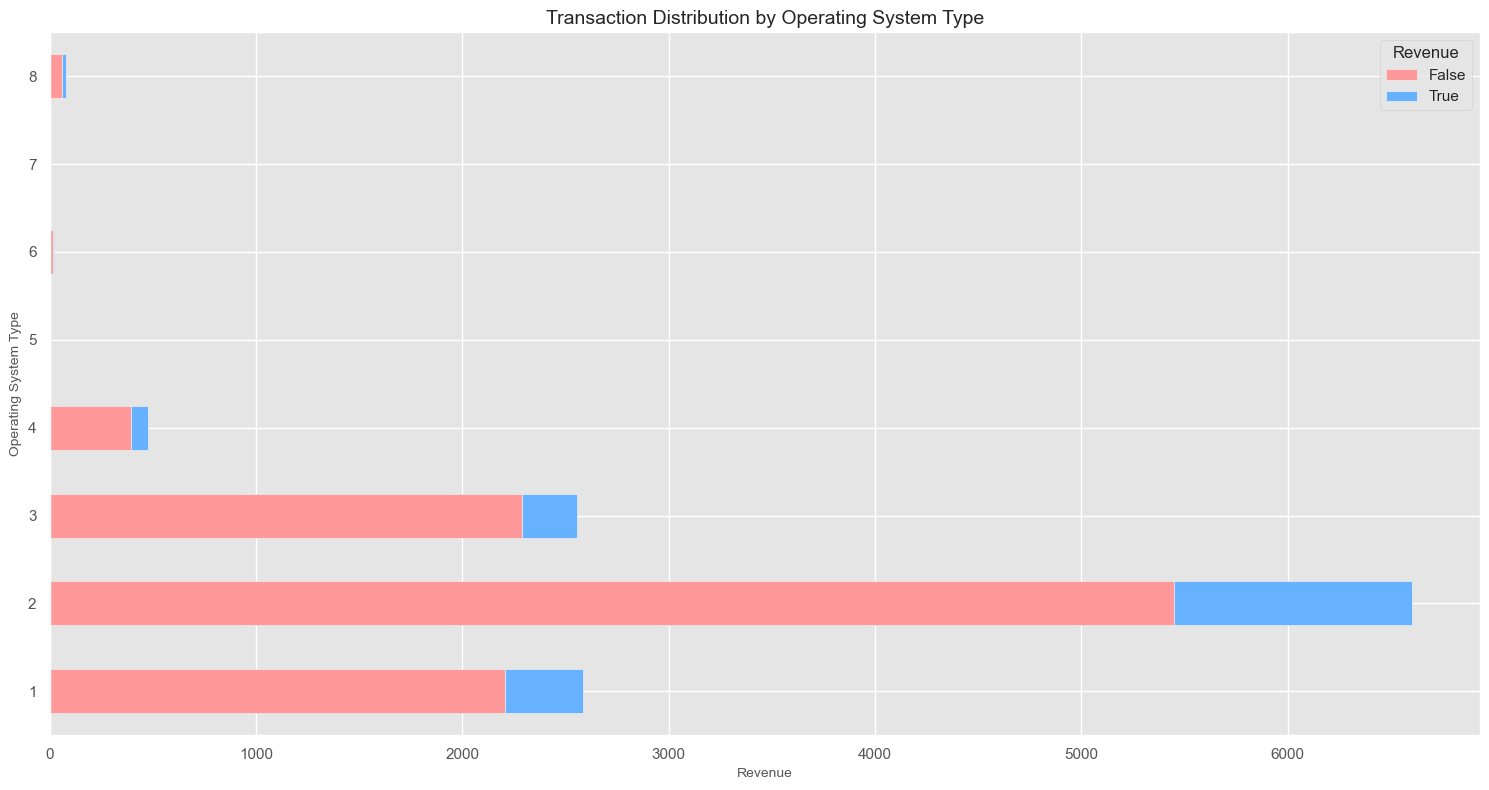

In [208]:
# Transaction Distribution by Operating System Type
# Aggregate and sort DataFrame
TrafficType_df = df[['TrafficType']].value_counts().reset_index(name='count')
TrafficType_df.columns = ['TrafficType', 'count']
TrafficType_df = TrafficType_df.sort_values(by='count', ascending=False)  # Sort by count

# Create horizontal stacked bar chart
contingency_table = pd.crosstab(df['OperatingSystems'], df['Revenue'])
fig, ax = plt.subplots(figsize=(15, 8))
contingency_table.plot(kind='barh', stacked=True, color=plot_settings['bar_colors'],  ax=ax)
plt.title('Transaction Distribution by Operating System Type', fontsize=14)
plt.xlabel('Revenue', fontsize=10)
plt.ylabel('Operating System Type', fontsize=10)
plt.tight_layout()
#plt.savefig('transition_os.png', dpi=300)
plt.show()


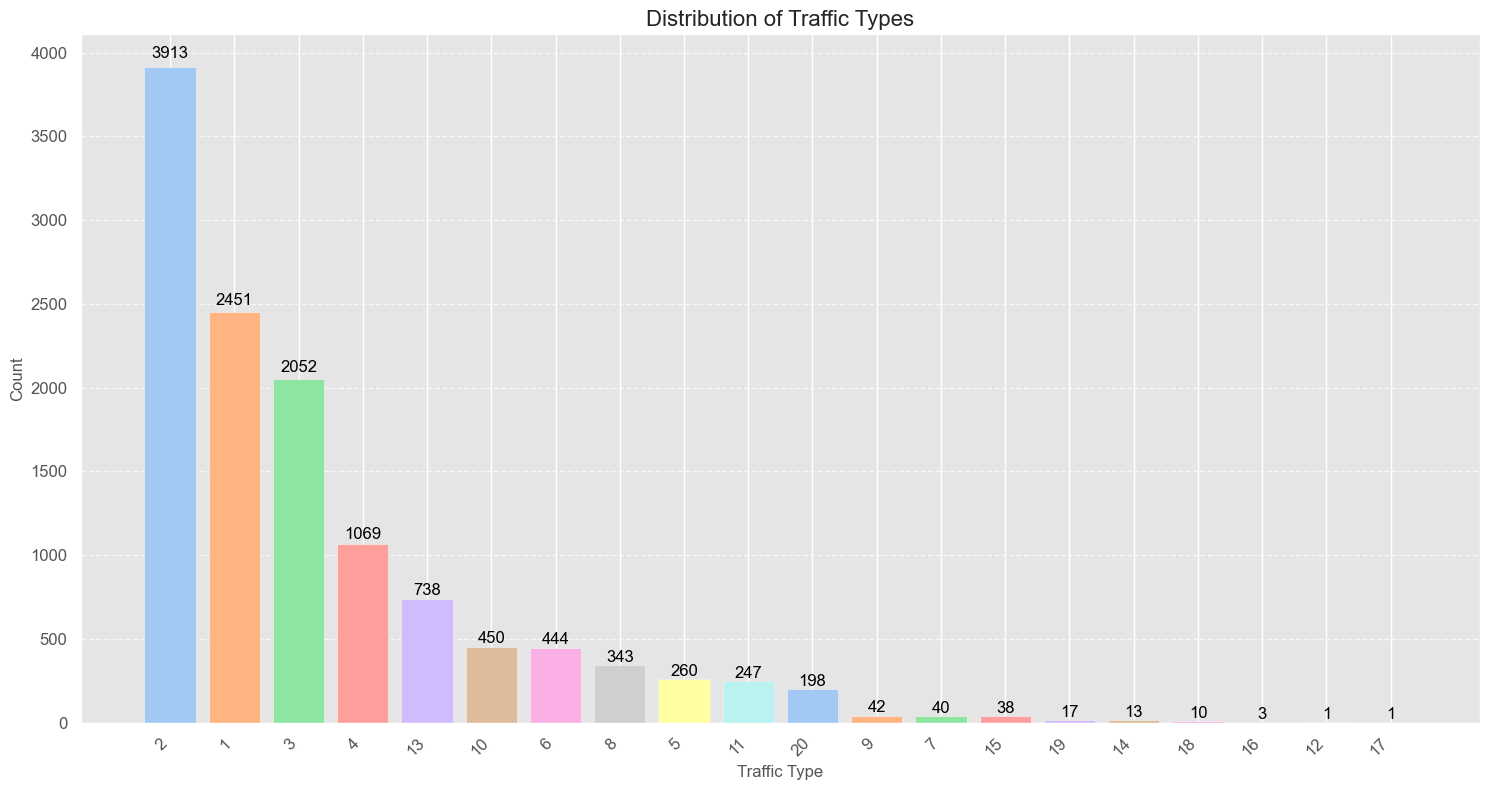

In [210]:
# Distribution of Traffic Types
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(TrafficType_df['TrafficType'].astype(str), TrafficType_df['count'], color=palette)

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, int(yval), ha='center', va='bottom', fontsize=plot_settings['autotext_fontsize'], color=plot_settings['autotext_color'])

# Improve aesthetics
plt.title('Distribution of Traffic Types', fontsize=plot_settings['title_fontsize'])
plt.xlabel('Traffic Type', fontsize=plot_settings['axis_fontsize'])
plt.ylabel('Count', fontsize=plot_settings['axis_fontsize'])
plt.xticks(rotation=45, ha='right', fontsize=plot_settings['axis_fontsize'])
plt.yticks(fontsize=plot_settings['axis_fontsize'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.tight_layout()
#plt.savefig('trafic_type.png', dpi=300)
plt.show()

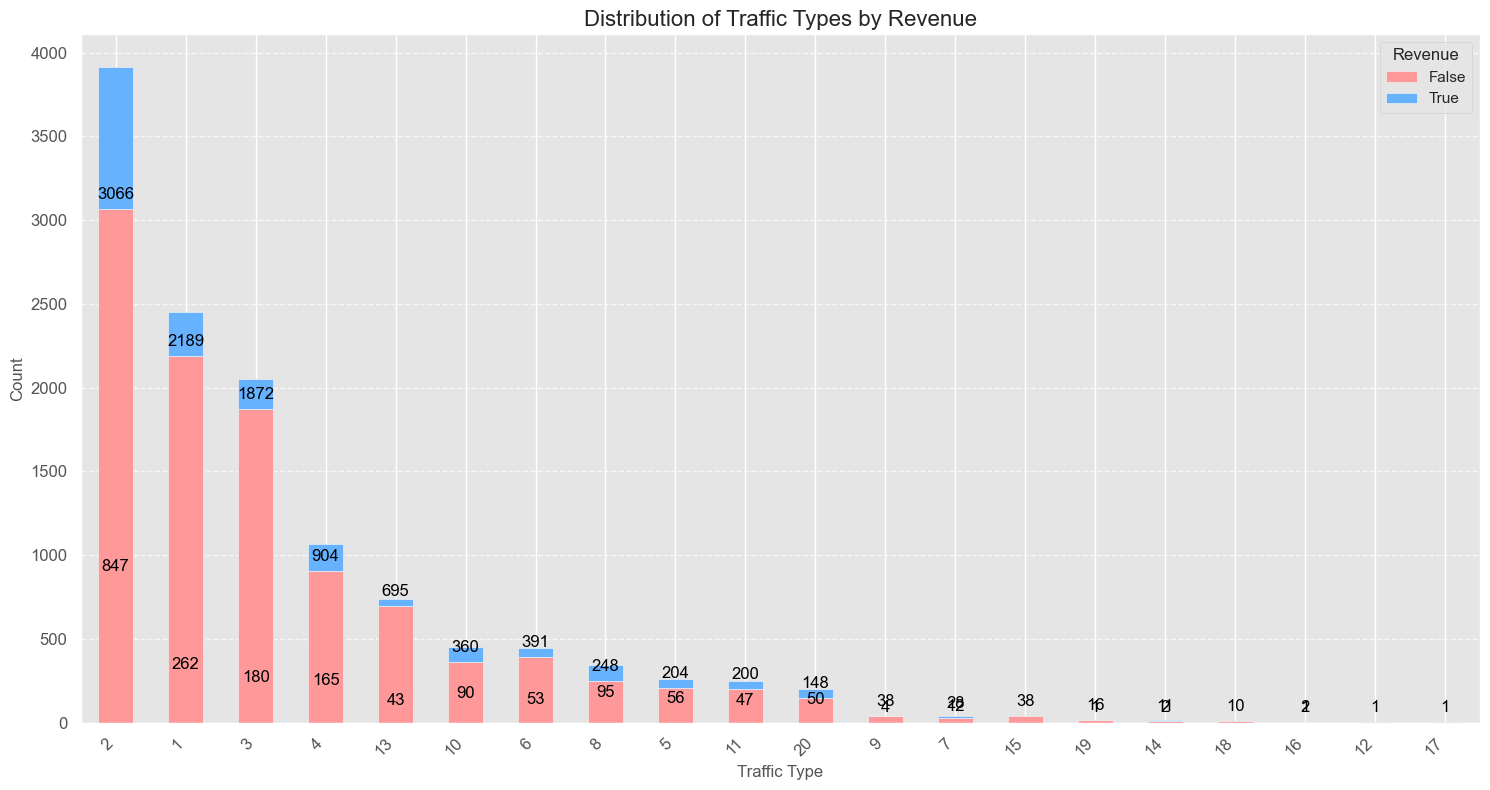

In [213]:
# Distribution of Traffic Types by Revenue
# Create a crosstab DataFrame
crosstab_df = pd.crosstab(df['TrafficType'], df['Revenue'])

# Sort the DataFrame by the total counts for each TrafficType in ascending order
crosstab_df['Total'] = crosstab_df.sum(axis=1)
crosstab_df = crosstab_df.sort_values(by='Total', ascending = False)
crosstab_df = crosstab_df.drop(columns='Total')  # Drop the 'Total' column used for sorting

# Plotting
plt.style.use(plot_settings['style'])  # Apply the style
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust size for better readability

# Plot stacked bar chart
crosstab_df.plot(kind='bar', stacked=True, ax=ax, color=plot_settings['crosstab_colors'])

# Add labels on top of bars
for container in ax.containers:
    for bar in container:
        yval = bar.get_height()
        if yval > 0:
            # Adjust label position to avoid overlapping
            ax.annotate(f'{int(yval)}',
                        xy=(bar.get_x() + bar.get_width() / 2, yval),
                        xytext=(0, 5),  # Adjust this offset if needed
                        textcoords='offset points',
                        ha='center',
                        va='bottom',
                        fontsize=plot_settings['autotext_fontsize'],
                        color=plot_settings['autotext_color'])

# Improve aesthetics
plt.title('Distribution of Traffic Types by Revenue', fontsize=plot_settings['title_fontsize'])
plt.xlabel('Traffic Type', fontsize=plot_settings['axis_fontsize'])
plt.ylabel('Count', fontsize=plot_settings['axis_fontsize'])
plt.xticks(rotation=45, ha='right', fontsize=plot_settings['axis_fontsize'])
plt.yticks(fontsize=plot_settings['axis_fontsize'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.tight_layout()
# Save the plot if needed
# plt.savefig('traffic_type_revenue.png', dpi=300)

plt.show()

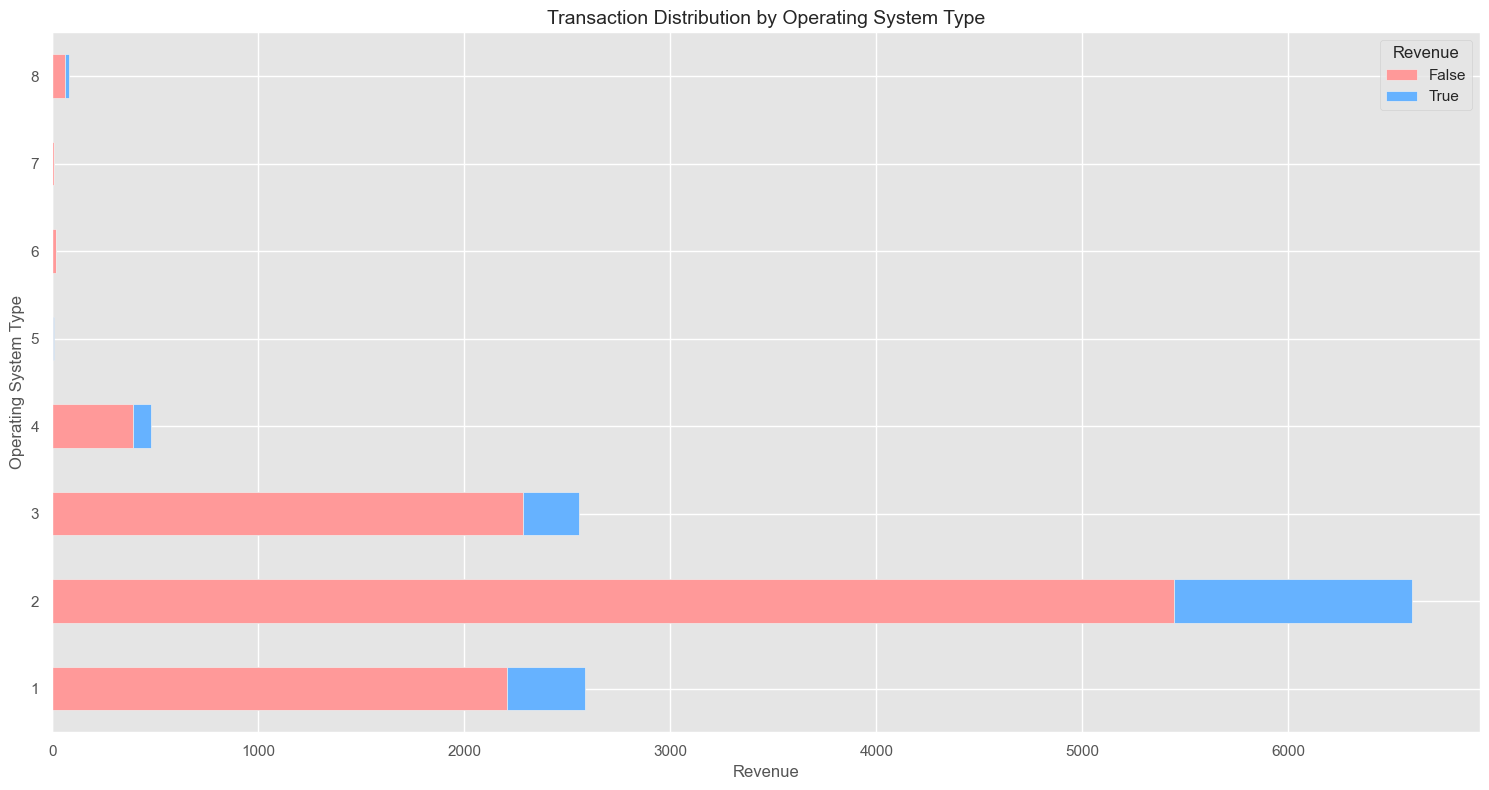

In [216]:
# Transaction Distribution by Operating System Type
# Aggregate and sort DataFrame
TrafficType_df = df[['TrafficType']].value_counts().reset_index(name='count')
TrafficType_df.columns = ['TrafficType', 'count']
TrafficType_df = TrafficType_df.sort_values(by='count', ascending=False)  # Sort by count

# Create horizontal stacked bar chart
contingency_table = pd.crosstab(df['OperatingSystems'], df['Revenue'])
fig, ax = plt.subplots(figsize=(15, 8))
contingency_table.plot(kind='barh', stacked=True, color=plot_settings['bar_colors'],  ax=ax)
plt.title('Transaction Distribution by Operating System Type', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Operating System Type', fontsize=12)
plt.tight_layout()
plt.show()


## ML MODEL

In [78]:
# maps

visitor_map = {'Returning_Visitor':1,'New_Visitor':2,'Other':3}
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}


df_original['Month'] = df_original['Month'].replace(month_mapping).astype(int)
df_original['VisitorType'] = df_original['VisitorType'].replace(visitor_map)
df_original[['Weekend', 'Revenue']] = df_original[['Weekend', 'Revenue']].astype(int)

In [79]:

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = df_original.iloc[:, 0:17]  
y = df_original.iloc[:, 17] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

In [80]:
print(y_res.value_counts())
print(y_res.shape)
print(X_res.shape)

0    10422
1    10422
Name: Revenue, dtype: int64
(20844,)
(20844, 17)


In [81]:
X = X_res.head(1000)
y = y_res.head(1000)

# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [82]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Modelo SVM V1
#### Modelo Base com Kernel Linear

In [83]:
modelo_v1 = svm.SVC(kernel = 'linear')

In [84]:
# Treinamento
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 54.95408821105957


In [85]:
# Treinamento
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 52.15668988227844


In [86]:
previsoes_v1 = modelo_v1.predict(X_teste)

In [87]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acurácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [88]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.44,
 'Recall': 0.8461538461538461,
 'F1 Score': 0.5789473684210525,
 'Acurácia': 0.9466666666666667,
 'AUC': 0.7163636363636363}

In [89]:
# Agora sim, a forma ideal de aplicar a padronização em treino e teste
# Padronização
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

In [90]:
X_treino_scaled

array([[-0.59034343, -0.4057962 , -0.31756214, ..., -0.75751167,
        -0.33597259, -0.54433105],
       [-0.59034343, -0.4057962 , -0.31756214, ..., -0.41048407,
        -0.33597259,  1.83711731],
       [ 0.07887179, -0.33374316, -0.31756214, ..., -0.75751167,
        -0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.4057962 , -0.31756214, ..., -0.41048407,
         2.97643326, -0.54433105],
       [ 0.07887179, -0.16343599, -0.31756214, ..., -0.41048407,
         2.97643326,  1.83711731],
       [-0.59034343, -0.4057962 , -0.31756214, ..., -0.41048407,
        -0.33597259, -0.54433105]])

In [91]:
X_teste_scaled

array([[ 0.4134794 , -0.0258802 , -0.31756214, ..., -0.06345648,
        -0.33597259, -0.54433105],
       [-0.25573582, -0.26169013, -0.31756214, ..., -0.41048407,
        -0.33597259, -0.54433105],
       [ 1.08269462,  1.52457009,  4.89244178, ..., -0.75751167,
        -0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.4057962 , -0.31756214, ..., -0.41048407,
        -0.33597259, -0.54433105],
       [-0.25573582, -0.4057962 , -0.31756214, ...,  0.63059872,
        -0.33597259,  1.83711731],
       [-0.59034343, -0.4057962 , -0.31756214, ..., -0.75751167,
        -0.33597259,  1.83711731]])

### Modelo SVM V2

In [92]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = 'linear')

In [93]:
# Treinamento
start = time.time()
modelo_v2.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 0.00700688362121582


In [94]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [96]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [97]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.48,
 'Recall': 0.8571428571428571,
 'F1 Score': 0.6153846153846153,
 'Acurácia': 0.95,
 'AUC': 0.7363636363636362}

### Modelo SVM V3

In [98]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.11299824714660645
Acurácia em Treinamento: 94.86%

Hiperparâmetros Ideais: {'C': 50.0, 'gamma': 0.003}


In [99]:
# Previsões
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [100]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_teste),
               'Recall':recall_score(previsoes_v3, y_teste),
               'F1 Score':f1_score(previsoes_v3, y_teste),
               'Acurácia':accuracy_score(previsoes_v3, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v3)}

In [101]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.52,
 'Recall': 0.8666666666666667,
 'F1 Score': 0.65,
 'Acurácia': 0.9533333333333334,
 'AUC': 0.7563636363636363}

### Modelo SVM V4

In [102]:
# Cria o modelo
modelo_v4 = svm.SVC(kernel = 'poly')

# Valores para o grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento
modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.15274310111999512
Acurácia em Treinamento: 94.86%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 3, 'gamma': 0.01}


In [103]:
# Previsões
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [104]:
# Dicionário de métricas e metadados
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v4, y_teste),
               'Recall':recall_score(previsoes_v4, y_teste),
               'F1 Score':f1_score(previsoes_v4, y_teste),
               'Acurácia':accuracy_score(previsoes_v4, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v4)}

In [105]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v4

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acurácia': 0.94,
 'AUC': 0.6945454545454546}

## review

In [106]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({'SVM_Modelo_1':pd.Series(SVM_dict_v1),
                       'SVM_Modelo_2':pd.Series(SVM_dict_v2),
                       'SVM_Modelo_3':pd.Series(SVM_dict_v3),
                       'SVM_Modelo_4':pd.Series(SVM_dict_v4)})

In [107]:
resumo

,SVM_Modelo_1,SVM_Modelo_2,SVM_Modelo_3,SVM_Modelo_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear com Dados Padronizados,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.44,0.48,0.52,0.4
Recall,0.846154,0.857143,0.866667,0.769231
F1 Score,0.578947,0.615385,0.65,0.526316
Acurácia,0.946667,0.95,0.953333,0.94
AUC,0.716364,0.736364,0.756364,0.694545
